In [2]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import os
import glob
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.init as init
from torch.optim import Adam, SGD
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

eps = np.finfo(float).eps

plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline
sns.set()

%load_ext autoreload
%autoreload 2

In [3]:
true_probs = np.load('distribution.npy')

In [4]:
samples = np.random.choice(200 * 200, p=true_probs.reshape(-1), size=100000)
samples_x = samples % 200
samples_y = samples // 200
samples = np.stack([samples_x, samples_y], axis=1)
train, val = train_test_split(samples, test_size=0.2)

In [81]:
tf.reset_default_graph()
sess = tf.Session()

thetas = tf.Variable(np.zeros(200), dtype=tf.float32, name='thetas', trainable=True)
ps = tf.exp(thetas) / tf.reduce_sum(tf.exp(thetas))

input_data = tf.placeholder(dtype=tf.int32, shape=(None, 2))
training = tf.placeholder(dtype=tf.bool)

x1s = input_data[:, 0]
x2s = input_data[:, 1]

output = tf.layers.dense(inputs=tf.one_hot(x1s, depth=200), 
                         units=200, 
                         activation='relu', 
                         use_bias=True,
                         kernel_initializer=tf.initializers.glorot_normal(),
                         bias_initializer=tf.initializers.glorot_normal())

output = tf.layers.dropout(inputs=output, training=training, rate=0.7)

output = tf.layers.dense(inputs=output, units=200, activation='softmax',
                         use_bias=True,
                         kernel_initializer=tf.initializers.glorot_normal(),
                         bias_initializer=tf.initializers.glorot_normal())

p_x1 = tf.gather(ps, x1s)
p_x2_x1 = tf.gather_nd(output, tf.stack([tf.range(tf.shape(input_data)[0]), x2s], axis=1))
final_prob = p_x1 * p_x2_x1

loss = tf.reduce_mean(-tf.log(p_x1) - tf.log(p_x2_x1))
loss *= np.log2(np.e)

In [82]:
opt = tf.train.AdamOptimizer(learning_rate=0.001)
train_step = opt.minimize(loss)
sess.run(tf.global_variables_initializer())

In [83]:
train_losses = []
val_losses = []

batch_size = 10

for i in range(40001):
    sample_batch = np.random.choice(len(train), size=batch_size)
    sample_batch = train[sample_batch]
    _, train_loss, p_x2_x1_tmp = sess.run([train_step, loss, p_x2_x1],
                            feed_dict={input_data: sample_batch,
                                      training: True})    
    train_losses.append(train_loss)
    
    print("")
    print(p_x2_x1_tmp.shape)
    print("")
    
    if i % 100 == 0:
        val_losses.append(np.mean(sess.run(loss, {input_data: val,
                                                 training: False})))
    
    print('\rStep {}\ttrain_loss: {}\tval_loss: {}'.format(i,
                                                           train_losses[-1],
                                                           val_losses[-1]), end='')



(10,)

Step 0	train_loss: 15.2875394821167	val_loss: 15.29515266418457
(10,)

Step 1	train_loss: 15.315890312194824	val_loss: 15.29515266418457
(10,)

Step 2	train_loss: 15.282522201538086	val_loss: 15.29515266418457
(10,)

Step 3	train_loss: 15.25860595703125	val_loss: 15.29515266418457
(10,)

Step 4	train_loss: 15.340636253356934	val_loss: 15.29515266418457
(10,)

Step 5	train_loss: 15.331151962280273	val_loss: 15.29515266418457
(10,)

Step 6	train_loss: 15.306975364685059	val_loss: 15.29515266418457
(10,)

Step 7	train_loss: 15.334443092346191	val_loss: 15.29515266418457
(10,)

Step 8	train_loss: 15.376666069030762	val_loss: 15.29515266418457
(10,)

Step 9	train_loss: 15.337055206298828	val_loss: 15.29515266418457
(10,)

Step 10	train_loss: 15.374058723449707	val_loss: 15.29515266418457
(10,)

Step 11	train_loss: 15.267077445983887	val_loss: 15.29515266418457
(10,)

Step 12	train_loss: 15.372364044189453	val_loss: 15.29515266418457
(10,)

Step 13	train_loss: 15.33327579498291	val_l

Step 200	train_loss: 15.34085464477539	val_loss: 15.287711143493652
(10,)

Step 201	train_loss: 15.268233299255371	val_loss: 15.287711143493652
(10,)

Step 202	train_loss: 15.269304275512695	val_loss: 15.287711143493652
(10,)

Step 203	train_loss: 15.361624717712402	val_loss: 15.287711143493652
(10,)

Step 204	train_loss: 15.361021995544434	val_loss: 15.287711143493652
(10,)

Step 205	train_loss: 15.274092674255371	val_loss: 15.287711143493652
(10,)

Step 206	train_loss: 15.245654106140137	val_loss: 15.287711143493652
(10,)

Step 207	train_loss: 15.33840560913086	val_loss: 15.287711143493652
(10,)

Step 208	train_loss: 15.19796085357666	val_loss: 15.287711143493652
(10,)

Step 209	train_loss: 15.159292221069336	val_loss: 15.287711143493652
(10,)

Step 210	train_loss: 15.475557327270508	val_loss: 15.287711143493652
(10,)

Step 211	train_loss: 15.318209648132324	val_loss: 15.287711143493652
(10,)

Step 212	train_loss: 15.501691818237305	val_loss: 15.287711143493652
(10,)

Step 213	train_

Step 317	train_loss: 15.349132537841797	val_loss: 15.282882690429688
(10,)

Step 318	train_loss: 15.535372734069824	val_loss: 15.282882690429688
(10,)

Step 319	train_loss: 15.316075325012207	val_loss: 15.282882690429688
(10,)

Step 320	train_loss: 15.444366455078125	val_loss: 15.282882690429688
(10,)

Step 321	train_loss: 15.245835304260254	val_loss: 15.282882690429688
(10,)

Step 322	train_loss: 15.288848876953125	val_loss: 15.282882690429688
(10,)

Step 323	train_loss: 15.138578414916992	val_loss: 15.282882690429688
(10,)

Step 324	train_loss: 15.36890983581543	val_loss: 15.282882690429688
(10,)

Step 325	train_loss: 15.3430757522583	val_loss: 15.282882690429688
(10,)

Step 326	train_loss: 15.28709888458252	val_loss: 15.282882690429688
(10,)

Step 327	train_loss: 15.170686721801758	val_loss: 15.282882690429688
(10,)

Step 328	train_loss: 15.362317085266113	val_loss: 15.282882690429688
(10,)

Step 329	train_loss: 15.37021541595459	val_loss: 15.282882690429688
(10,)

Step 330	train_lo

Step 441	train_loss: 15.271425247192383	val_loss: 15.27816104888916
(10,)

Step 442	train_loss: 15.322587966918945	val_loss: 15.27816104888916
(10,)

Step 443	train_loss: 15.20963191986084	val_loss: 15.27816104888916
(10,)

Step 444	train_loss: 15.27868366241455	val_loss: 15.27816104888916
(10,)

Step 445	train_loss: 15.257257461547852	val_loss: 15.27816104888916
(10,)

Step 446	train_loss: 15.272481918334961	val_loss: 15.27816104888916
(10,)

Step 447	train_loss: 15.263655662536621	val_loss: 15.27816104888916
(10,)

Step 448	train_loss: 15.214611053466797	val_loss: 15.27816104888916
(10,)

Step 449	train_loss: 15.372392654418945	val_loss: 15.27816104888916
(10,)

Step 450	train_loss: 15.397188186645508	val_loss: 15.27816104888916
(10,)

Step 451	train_loss: 15.33675765991211	val_loss: 15.27816104888916
(10,)

Step 452	train_loss: 15.433695793151855	val_loss: 15.27816104888916
(10,)

Step 453	train_loss: 15.35068130493164	val_loss: 15.27816104888916
(10,)

Step 454	train_loss: 15.29097

Step 556	train_loss: 15.355213165283203	val_loss: 15.275039672851562
(10,)

Step 557	train_loss: 15.190841674804688	val_loss: 15.275039672851562
(10,)

Step 558	train_loss: 15.065171241760254	val_loss: 15.275039672851562
(10,)

Step 559	train_loss: 15.337311744689941	val_loss: 15.275039672851562
(10,)

Step 560	train_loss: 15.204025268554688	val_loss: 15.275039672851562
(10,)

Step 561	train_loss: 15.343249320983887	val_loss: 15.275039672851562
(10,)

Step 562	train_loss: 15.319361686706543	val_loss: 15.275039672851562
(10,)

Step 563	train_loss: 15.450028419494629	val_loss: 15.275039672851562
(10,)

Step 564	train_loss: 15.092387199401855	val_loss: 15.275039672851562
(10,)

Step 565	train_loss: 15.176923751831055	val_loss: 15.275039672851562
(10,)

Step 566	train_loss: 15.212652206420898	val_loss: 15.275039672851562
(10,)

Step 567	train_loss: 15.120772361755371	val_loss: 15.275039672851562
(10,)

Step 568	train_loss: 15.269613265991211	val_loss: 15.275039672851562
(10,)

Step 569	tra

Step 676	train_loss: 15.108272552490234	val_loss: 15.271615982055664
(10,)

Step 677	train_loss: 15.175970077514648	val_loss: 15.271615982055664
(10,)

Step 678	train_loss: 15.335737228393555	val_loss: 15.271615982055664
(10,)

Step 679	train_loss: 15.266096115112305	val_loss: 15.271615982055664
(10,)

Step 680	train_loss: 15.2014799118042	val_loss: 15.271615982055664
(10,)

Step 681	train_loss: 15.336834907531738	val_loss: 15.271615982055664
(10,)

Step 682	train_loss: 15.216257095336914	val_loss: 15.271615982055664
(10,)

Step 683	train_loss: 15.395767211914062	val_loss: 15.271615982055664
(10,)

Step 684	train_loss: 15.284006118774414	val_loss: 15.271615982055664
(10,)

Step 685	train_loss: 15.252359390258789	val_loss: 15.271615982055664
(10,)

Step 686	train_loss: 15.148971557617188	val_loss: 15.271615982055664
(10,)

Step 687	train_loss: 15.331932067871094	val_loss: 15.271615982055664
(10,)

Step 688	train_loss: 15.488042831420898	val_loss: 15.271615982055664
(10,)

Step 689	train

Step 800	train_loss: 15.456350326538086	val_loss: 15.26583480834961
(10,)

Step 801	train_loss: 15.433938980102539	val_loss: 15.26583480834961
(10,)

Step 802	train_loss: 15.524736404418945	val_loss: 15.26583480834961
(10,)

Step 803	train_loss: 15.472947120666504	val_loss: 15.26583480834961
(10,)

Step 804	train_loss: 15.318610191345215	val_loss: 15.26583480834961
(10,)

Step 805	train_loss: 15.293859481811523	val_loss: 15.26583480834961
(10,)

Step 806	train_loss: 15.310629844665527	val_loss: 15.26583480834961
(10,)

Step 807	train_loss: 15.342693328857422	val_loss: 15.26583480834961
(10,)

Step 808	train_loss: 15.470162391662598	val_loss: 15.26583480834961
(10,)

Step 809	train_loss: 15.252513885498047	val_loss: 15.26583480834961
(10,)

Step 810	train_loss: 15.282980918884277	val_loss: 15.26583480834961
(10,)

Step 811	train_loss: 15.177815437316895	val_loss: 15.26583480834961
(10,)

Step 812	train_loss: 15.214343070983887	val_loss: 15.26583480834961
(10,)

Step 813	train_loss: 15.0

Step 924	train_loss: 15.230026245117188	val_loss: 15.26294994354248
(10,)

Step 925	train_loss: 15.306331634521484	val_loss: 15.26294994354248
(10,)

Step 926	train_loss: 15.307145118713379	val_loss: 15.26294994354248
(10,)

Step 927	train_loss: 15.268280982971191	val_loss: 15.26294994354248
(10,)

Step 928	train_loss: 15.410195350646973	val_loss: 15.26294994354248
(10,)

Step 929	train_loss: 15.298633575439453	val_loss: 15.26294994354248
(10,)

Step 930	train_loss: 15.296659469604492	val_loss: 15.26294994354248
(10,)

Step 931	train_loss: 15.398921966552734	val_loss: 15.26294994354248
(10,)

Step 932	train_loss: 15.372828483581543	val_loss: 15.26294994354248
(10,)

Step 933	train_loss: 15.205288887023926	val_loss: 15.26294994354248
(10,)

Step 934	train_loss: 15.232760429382324	val_loss: 15.26294994354248
(10,)

Step 935	train_loss: 15.0853853225708	val_loss: 15.26294994354248
(10,)

Step 936	train_loss: 15.225096702575684	val_loss: 15.26294994354248
(10,)

Step 937	train_loss: 15.352

Step 1042	train_loss: 15.169943809509277	val_loss: 15.261128425598145
(10,)

Step 1043	train_loss: 15.264386177062988	val_loss: 15.261128425598145
(10,)

Step 1044	train_loss: 15.330337524414062	val_loss: 15.261128425598145
(10,)

Step 1045	train_loss: 15.109136581420898	val_loss: 15.261128425598145
(10,)

Step 1046	train_loss: 15.089556694030762	val_loss: 15.261128425598145
(10,)

Step 1047	train_loss: 15.1027193069458	val_loss: 15.261128425598145
(10,)

Step 1048	train_loss: 15.168432235717773	val_loss: 15.261128425598145
(10,)

Step 1049	train_loss: 14.95740795135498	val_loss: 15.261128425598145
(10,)

Step 1050	train_loss: 15.172314643859863	val_loss: 15.261128425598145
(10,)

Step 1051	train_loss: 15.2612886428833	val_loss: 15.261128425598145
(10,)

Step 1052	train_loss: 15.415962219238281	val_loss: 15.261128425598145
(10,)

Step 1053	train_loss: 15.229157447814941	val_loss: 15.261128425598145
(10,)

Step 1054	train_loss: 15.23487377166748	val_loss: 15.261128425598145
(10,)

Step 

Step 1173	train_loss: 15.088105201721191	val_loss: 15.259836196899414
(10,)

Step 1174	train_loss: 15.249939918518066	val_loss: 15.259836196899414
(10,)

Step 1175	train_loss: 15.188446998596191	val_loss: 15.259836196899414
(10,)

Step 1176	train_loss: 15.32103157043457	val_loss: 15.259836196899414
(10,)

Step 1177	train_loss: 15.330902099609375	val_loss: 15.259836196899414
(10,)

Step 1178	train_loss: 15.454132080078125	val_loss: 15.259836196899414
(10,)

Step 1179	train_loss: 15.257158279418945	val_loss: 15.259836196899414
(10,)

Step 1180	train_loss: 15.236106872558594	val_loss: 15.259836196899414
(10,)

Step 1181	train_loss: 15.336856842041016	val_loss: 15.259836196899414
(10,)

Step 1182	train_loss: 15.361116409301758	val_loss: 15.259836196899414
(10,)

Step 1183	train_loss: 15.390552520751953	val_loss: 15.259836196899414
(10,)

Step 1184	train_loss: 15.131640434265137	val_loss: 15.259836196899414
(10,)

Step 1185	train_loss: 15.047661781311035	val_loss: 15.259836196899414
(10,)



Step 1294	train_loss: 15.289093971252441	val_loss: 15.257306098937988
(10,)

Step 1295	train_loss: 15.373663902282715	val_loss: 15.257306098937988
(10,)

Step 1296	train_loss: 15.197110176086426	val_loss: 15.257306098937988
(10,)

Step 1297	train_loss: 15.253897666931152	val_loss: 15.257306098937988
(10,)

Step 1298	train_loss: 15.277851104736328	val_loss: 15.257306098937988
(10,)

Step 1299	train_loss: 15.48206615447998	val_loss: 15.257306098937988
(10,)

Step 1300	train_loss: 15.061681747436523	val_loss: 15.255044937133789
(10,)

Step 1301	train_loss: 15.285768508911133	val_loss: 15.255044937133789
(10,)

Step 1302	train_loss: 15.314945220947266	val_loss: 15.255044937133789
(10,)

Step 1303	train_loss: 15.113263130187988	val_loss: 15.255044937133789
(10,)

Step 1304	train_loss: 15.008076667785645	val_loss: 15.255044937133789
(10,)

Step 1305	train_loss: 15.338593482971191	val_loss: 15.255044937133789
(10,)

Step 1306	train_loss: 15.24899673461914	val_loss: 15.255044937133789
(10,)

S

Step 1400	train_loss: 15.350119590759277	val_loss: 15.253691673278809
(10,)

Step 1401	train_loss: 15.118429183959961	val_loss: 15.253691673278809
(10,)

Step 1402	train_loss: 14.970088005065918	val_loss: 15.253691673278809
(10,)

Step 1403	train_loss: 15.219756126403809	val_loss: 15.253691673278809
(10,)

Step 1404	train_loss: 15.4004545211792	val_loss: 15.253691673278809
(10,)

Step 1405	train_loss: 15.256158828735352	val_loss: 15.253691673278809
(10,)

Step 1406	train_loss: 15.313750267028809	val_loss: 15.253691673278809
(10,)

Step 1407	train_loss: 15.436519622802734	val_loss: 15.253691673278809
(10,)

Step 1408	train_loss: 15.351184844970703	val_loss: 15.253691673278809
(10,)

Step 1409	train_loss: 15.204633712768555	val_loss: 15.253691673278809
(10,)

Step 1410	train_loss: 15.241537094116211	val_loss: 15.253691673278809
(10,)

Step 1411	train_loss: 15.420708656311035	val_loss: 15.253691673278809
(10,)

Step 1412	train_loss: 15.144485473632812	val_loss: 15.253691673278809
(10,)

S

Step 1515	train_loss: 15.293789863586426	val_loss: 15.252738952636719
(10,)

Step 1516	train_loss: 15.26438045501709	val_loss: 15.252738952636719
(10,)

Step 1517	train_loss: 15.172955513000488	val_loss: 15.252738952636719
(10,)

Step 1518	train_loss: 15.192066192626953	val_loss: 15.252738952636719
(10,)

Step 1519	train_loss: 15.316648483276367	val_loss: 15.252738952636719
(10,)

Step 1520	train_loss: 15.301980972290039	val_loss: 15.252738952636719
(10,)

Step 1521	train_loss: 15.50827407836914	val_loss: 15.252738952636719
(10,)

Step 1522	train_loss: 15.320926666259766	val_loss: 15.252738952636719
(10,)

Step 1523	train_loss: 15.389809608459473	val_loss: 15.252738952636719
(10,)

Step 1524	train_loss: 15.126537322998047	val_loss: 15.252738952636719
(10,)

Step 1525	train_loss: 15.239386558532715	val_loss: 15.252738952636719
(10,)

Step 1526	train_loss: 15.277389526367188	val_loss: 15.252738952636719
(10,)

Step 1527	train_loss: 15.201725006103516	val_loss: 15.252738952636719
(10,)

S

Step 1632	train_loss: 15.232486724853516	val_loss: 15.251588821411133
(10,)

Step 1633	train_loss: 15.258671760559082	val_loss: 15.251588821411133
(10,)

Step 1634	train_loss: 15.381595611572266	val_loss: 15.251588821411133
(10,)

Step 1635	train_loss: 15.220453262329102	val_loss: 15.251588821411133
(10,)

Step 1636	train_loss: 15.282873153686523	val_loss: 15.251588821411133
(10,)

Step 1637	train_loss: 15.342267036437988	val_loss: 15.251588821411133
(10,)

Step 1638	train_loss: 15.101724624633789	val_loss: 15.251588821411133
(10,)

Step 1639	train_loss: 15.094026565551758	val_loss: 15.251588821411133
(10,)

Step 1640	train_loss: 15.28735637664795	val_loss: 15.251588821411133
(10,)

Step 1641	train_loss: 15.149417877197266	val_loss: 15.251588821411133
(10,)

Step 1642	train_loss: 15.154457092285156	val_loss: 15.251588821411133
(10,)

Step 1643	train_loss: 15.308553695678711	val_loss: 15.251588821411133
(10,)

Step 1644	train_loss: 15.394030570983887	val_loss: 15.251588821411133
(10,)



Step 1752	train_loss: 15.298369407653809	val_loss: 15.250239372253418
(10,)

Step 1753	train_loss: 15.416919708251953	val_loss: 15.250239372253418
(10,)

Step 1754	train_loss: 15.466683387756348	val_loss: 15.250239372253418
(10,)

Step 1755	train_loss: 15.167981147766113	val_loss: 15.250239372253418
(10,)

Step 1756	train_loss: 15.126209259033203	val_loss: 15.250239372253418
(10,)

Step 1757	train_loss: 15.263202667236328	val_loss: 15.250239372253418
(10,)

Step 1758	train_loss: 15.189438819885254	val_loss: 15.250239372253418
(10,)

Step 1759	train_loss: 15.160314559936523	val_loss: 15.250239372253418
(10,)

Step 1760	train_loss: 15.394244194030762	val_loss: 15.250239372253418
(10,)

Step 1761	train_loss: 15.326501846313477	val_loss: 15.250239372253418
(10,)

Step 1762	train_loss: 15.424870491027832	val_loss: 15.250239372253418
(10,)

Step 1763	train_loss: 15.376160621643066	val_loss: 15.250239372253418
(10,)

Step 1764	train_loss: 15.323461532592773	val_loss: 15.250239372253418
(10,)


Step 1872	train_loss: 15.142037391662598	val_loss: 15.249105453491211
(10,)

Step 1873	train_loss: 15.269359588623047	val_loss: 15.249105453491211
(10,)

Step 1874	train_loss: 15.308780670166016	val_loss: 15.249105453491211
(10,)

Step 1875	train_loss: 15.290456771850586	val_loss: 15.249105453491211
(10,)

Step 1876	train_loss: 15.124894142150879	val_loss: 15.249105453491211
(10,)

Step 1877	train_loss: 15.06997013092041	val_loss: 15.249105453491211
(10,)

Step 1878	train_loss: 15.310456275939941	val_loss: 15.249105453491211
(10,)

Step 1879	train_loss: 15.223477363586426	val_loss: 15.249105453491211
(10,)

Step 1880	train_loss: 15.156225204467773	val_loss: 15.249105453491211
(10,)

Step 1881	train_loss: 15.225932121276855	val_loss: 15.249105453491211
(10,)

Step 1882	train_loss: 15.271585464477539	val_loss: 15.249105453491211
(10,)

Step 1883	train_loss: 15.357351303100586	val_loss: 15.249105453491211
(10,)

Step 1884	train_loss: 15.338074684143066	val_loss: 15.249105453491211
(10,)



Step 1990	train_loss: 15.298209190368652	val_loss: 15.248306274414062
(10,)

Step 1991	train_loss: 15.167708396911621	val_loss: 15.248306274414062
(10,)

Step 1992	train_loss: 15.20244312286377	val_loss: 15.248306274414062
(10,)

Step 1993	train_loss: 15.16740608215332	val_loss: 15.248306274414062
(10,)

Step 1994	train_loss: 15.25022029876709	val_loss: 15.248306274414062
(10,)

Step 1995	train_loss: 15.336101531982422	val_loss: 15.248306274414062
(10,)

Step 1996	train_loss: 15.267681121826172	val_loss: 15.248306274414062
(10,)

Step 1997	train_loss: 15.147590637207031	val_loss: 15.248306274414062
(10,)

Step 1998	train_loss: 15.36905574798584	val_loss: 15.248306274414062
(10,)

Step 1999	train_loss: 15.395209312438965	val_loss: 15.248306274414062
(10,)

Step 2000	train_loss: 15.283255577087402	val_loss: 15.24732780456543
(10,)

Step 2001	train_loss: 15.383842468261719	val_loss: 15.24732780456543
(10,)

Step 2002	train_loss: 15.238822937011719	val_loss: 15.24732780456543
(10,)

Step 2

Step 2100	train_loss: 15.16545581817627	val_loss: 15.247018814086914
(10,)

Step 2101	train_loss: 15.228400230407715	val_loss: 15.247018814086914
(10,)

Step 2102	train_loss: 15.577706336975098	val_loss: 15.247018814086914
(10,)

Step 2103	train_loss: 15.238385200500488	val_loss: 15.247018814086914
(10,)

Step 2104	train_loss: 15.156496047973633	val_loss: 15.247018814086914
(10,)

Step 2105	train_loss: 15.208788871765137	val_loss: 15.247018814086914
(10,)

Step 2106	train_loss: 15.361629486083984	val_loss: 15.247018814086914
(10,)

Step 2107	train_loss: 15.300322532653809	val_loss: 15.247018814086914
(10,)

Step 2108	train_loss: 15.229127883911133	val_loss: 15.247018814086914
(10,)

Step 2109	train_loss: 15.269582748413086	val_loss: 15.247018814086914
(10,)

Step 2110	train_loss: 15.333971977233887	val_loss: 15.247018814086914
(10,)

Step 2111	train_loss: 15.089442253112793	val_loss: 15.247018814086914
(10,)

Step 2112	train_loss: 15.102187156677246	val_loss: 15.247018814086914
(10,)



Step 2213	train_loss: 15.311359405517578	val_loss: 15.246428489685059
(10,)

Step 2214	train_loss: 15.15578556060791	val_loss: 15.246428489685059
(10,)

Step 2215	train_loss: 15.331488609313965	val_loss: 15.246428489685059
(10,)

Step 2216	train_loss: 15.135345458984375	val_loss: 15.246428489685059
(10,)

Step 2217	train_loss: 15.2731294631958	val_loss: 15.246428489685059
(10,)

Step 2218	train_loss: 15.168652534484863	val_loss: 15.246428489685059
(10,)

Step 2219	train_loss: 15.337089538574219	val_loss: 15.246428489685059
(10,)

Step 2220	train_loss: 15.310321807861328	val_loss: 15.246428489685059
(10,)

Step 2221	train_loss: 15.11514949798584	val_loss: 15.246428489685059
(10,)

Step 2222	train_loss: 15.12086009979248	val_loss: 15.246428489685059
(10,)

Step 2223	train_loss: 15.270731925964355	val_loss: 15.246428489685059
(10,)

Step 2224	train_loss: 15.145343780517578	val_loss: 15.246428489685059
(10,)

Step 2225	train_loss: 14.879374504089355	val_loss: 15.246428489685059
(10,)

Step

Step 2329	train_loss: 15.329121589660645	val_loss: 15.245453834533691
(10,)

Step 2330	train_loss: 15.252707481384277	val_loss: 15.245453834533691
(10,)

Step 2331	train_loss: 15.137494087219238	val_loss: 15.245453834533691
(10,)

Step 2332	train_loss: 15.101861953735352	val_loss: 15.245453834533691
(10,)

Step 2333	train_loss: 15.018357276916504	val_loss: 15.245453834533691
(10,)

Step 2334	train_loss: 15.037883758544922	val_loss: 15.245453834533691
(10,)

Step 2335	train_loss: 15.24647045135498	val_loss: 15.245453834533691
(10,)

Step 2336	train_loss: 15.275690078735352	val_loss: 15.245453834533691
(10,)

Step 2337	train_loss: 15.295517921447754	val_loss: 15.245453834533691
(10,)

Step 2338	train_loss: 15.631367683410645	val_loss: 15.245453834533691
(10,)

Step 2339	train_loss: 15.230599403381348	val_loss: 15.245453834533691
(10,)

Step 2340	train_loss: 15.310548782348633	val_loss: 15.245453834533691
(10,)

Step 2341	train_loss: 15.418800354003906	val_loss: 15.245453834533691
(10,)



Step 2447	train_loss: 15.338003158569336	val_loss: 15.244722366333008
(10,)

Step 2448	train_loss: 15.223417282104492	val_loss: 15.244722366333008
(10,)

Step 2449	train_loss: 15.29391860961914	val_loss: 15.244722366333008
(10,)

Step 2450	train_loss: 15.22107219696045	val_loss: 15.244722366333008
(10,)

Step 2451	train_loss: 15.179549217224121	val_loss: 15.244722366333008
(10,)

Step 2452	train_loss: 15.10671615600586	val_loss: 15.244722366333008
(10,)

Step 2453	train_loss: 15.382514953613281	val_loss: 15.244722366333008
(10,)

Step 2454	train_loss: 15.408220291137695	val_loss: 15.244722366333008
(10,)

Step 2455	train_loss: 15.148228645324707	val_loss: 15.244722366333008
(10,)

Step 2456	train_loss: 15.269227981567383	val_loss: 15.244722366333008
(10,)

Step 2457	train_loss: 15.20789623260498	val_loss: 15.244722366333008
(10,)

Step 2458	train_loss: 15.413349151611328	val_loss: 15.244722366333008
(10,)

Step 2459	train_loss: 15.216814041137695	val_loss: 15.244722366333008
(10,)

Ste

Step 2564	train_loss: 15.346292495727539	val_loss: 15.243876457214355
(10,)

Step 2565	train_loss: 15.542759895324707	val_loss: 15.243876457214355
(10,)

Step 2566	train_loss: 15.433966636657715	val_loss: 15.243876457214355
(10,)

Step 2567	train_loss: 15.25141429901123	val_loss: 15.243876457214355
(10,)

Step 2568	train_loss: 15.265914916992188	val_loss: 15.243876457214355
(10,)

Step 2569	train_loss: 15.188860893249512	val_loss: 15.243876457214355
(10,)

Step 2570	train_loss: 15.25406551361084	val_loss: 15.243876457214355

KeyboardInterrupt: 

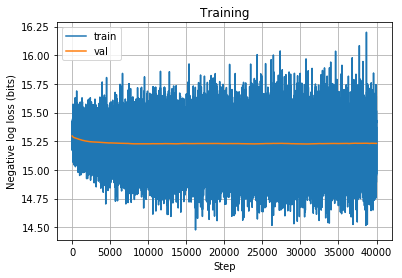

In [50]:
plt.plot(np.arange(len(train_losses)), train_losses, label='train')
plt.plot(np.arange(0, len(val_losses) * 100, 100), val_losses, label='val')
plt.title('Training')
plt.xlabel('Step')
plt.ylabel('Negative log loss (bits)')
plt.legend()
plt.grid(True)

In [51]:
all_datapoints = [(x, y) for x in range(200) for y in range(200)]
final_ps = sess.run(final_prob, {input_data: all_datapoints, training: False}) \
    .reshape((200, 200))


In [31]:

final_p_x2_x1 = sess.run(p_x2_x1, {input_data: all_datapoints, training: False}) \
    .reshape((200, 200))

final_p_x1 = sess.run(p_x1, {input_data: all_datapoints, training: False}) \
    .reshape((200, 200))

In [35]:
# p_x1 = tf.gather(ps, x1s)

final_ps = sess.run(ps, {input_data: all_datapoints, training: False}) \
    .reshape((200, 200))

ValueError: cannot reshape array of size 200 into shape (200,200)

In [28]:
final_p_x2_x1.shape

(200, 200)

In [32]:
final_p_x1.shape

(200, 200)

In [29]:
print(final_ps[0])

[1.9958317e-05 1.8875893e-05 2.2873155e-05 1.7523960e-05 1.8030360e-05
 1.1462737e-05 2.3208453e-05 1.7859473e-05 1.9479607e-05 2.1443864e-05
 2.0357664e-05 1.6710226e-05 2.1241898e-05 2.4566449e-05 1.6528595e-05
 2.0132687e-05 2.0837913e-05 1.5034740e-05 1.9615498e-05 1.9660009e-05
 1.5874466e-05 1.7587217e-05 2.2155129e-05 1.5613057e-05 1.7922046e-05
 2.1641896e-05 1.7913104e-05 1.9322726e-05 2.0847956e-05 1.7509128e-05
 2.1930631e-05 2.1332178e-05 1.4406248e-05 1.8951589e-05 1.8672064e-05
 1.7444638e-05 1.7001776e-05 2.3245193e-05 1.9598743e-05 2.0307665e-05
 1.9085282e-05 1.9458130e-05 2.0820920e-05 1.9427829e-05 1.9202711e-05
 1.7860488e-05 2.5035699e-05 1.8610905e-05 2.3808578e-05 2.2790435e-05
 2.5498546e-05 2.1626664e-05 2.3378605e-05 1.7630018e-05 2.0081407e-05
 2.0871104e-05 2.1848802e-05 1.9542656e-05 2.0146827e-05 1.8465562e-05
 2.1406862e-05 2.3093568e-05 2.3858824e-05 2.1723479e-05 2.3569646e-05
 2.1330621e-05 2.4987445e-05 2.3591541e-05 2.0726666e-05 2.4166833e-05
 2.634

In [30]:
print(final_p_x2_x1[0])

[0.00461876 0.00436826 0.00529331 0.0040554  0.00417259 0.00265271
 0.0053709  0.00413304 0.00450797 0.00496254 0.00471117 0.00386708
 0.0049158  0.00568517 0.00382505 0.00465911 0.00482231 0.00347934
 0.00453942 0.00454972 0.00367367 0.00407004 0.00512714 0.00361318
 0.00414752 0.00500837 0.00414545 0.00447167 0.00482464 0.00405196
 0.00507519 0.00493669 0.0033339  0.00438578 0.00432109 0.00403704
 0.00393455 0.0053794  0.00453554 0.0046996  0.00441672 0.004503
 0.00481838 0.00449599 0.00444389 0.00413328 0.00579376 0.00430694
 0.00550978 0.00527416 0.00590088 0.00500484 0.00541028 0.00407994
 0.00464724 0.00482999 0.00505625 0.00452256 0.00466238 0.0042733
 0.00495398 0.00534432 0.00552141 0.00502725 0.00545449 0.00493633
 0.0057826  0.00545956 0.00479657 0.00559269 0.00609746 0.00400382
 0.00611399 0.00589644 0.00508488 0.0068966  0.00512057 0.00543509
 0.00434456 0.0062118  0.00568916 0.00454702 0.00576039 0.0058563
 0.00510203 0.00479859 0.00549813 0.00398192 0.00489905 0.00520813

#### Mask tests

In [8]:
class MaskedLinear(nn.Linear):
    
    def __init__(self, in_features, out_features, bias=True):
        super(MaskedLinear, self).__init__(in_features, out_features, bias=bias)
        self.register_buffer('mask', torch.ones([out_features, in_features]).double())
        self.reset_parameters()

    def forward(self, x):
        return F.linear(x, self.mask * self.weight, self.bias)
    
    def set_mask(self, mask):
        mask = torch.from_numpy(mask.astype(np.uint8).T)
        assert(self.mask.data.size() == mask.size())
        self.mask.data.copy_(mask)
        
    def reset_parameters(self):
        init.kaiming_uniform_(self.weight)
        if self.bias is not None:
            init.zeros_(self.bias)

In [4]:
d = 6
n_classes = 1
input_size = d * n_classes
hidden_size = 6
n_hidden_layers = 3

layers = nn.ModuleList()
layers.append(MaskedLinear(input_size, hidden_size))
for i in range(n_hidden_layers - 1):
    layers.append(MaskedLinear(hidden_size, hidden_size))
output_layer = MaskedLinear(hidden_size, input_size)

# sampling m^1 vectors
# if n_classes = 3, dim = 2
# [1, 1, 1, 2, 2, 2]
m = []
m_0 = []
for i in range(d):
    m_0.extend([i + 1] * n_classes)

m.append(np.array(m_0))

print(m)

print("min m[-1] {}".format(min(m[-1])))

for i in range(n_hidden_layers):
    print(m[-1])
    print(min(m[-1]))
    m.append(np.random.randint(min(m[-1]), d, [hidden_size]))

print('---------------------')
    
# Construct masks
for i in np.arange(1, n_hidden_layers + 1):
    # these are V and W, check V smaller current dim
    # check W larger then current dim.
    # 
    a = m[i].reshape(-1, 1)
    b = m[i - 1].reshape(1, -1)
    mask = (a >= b).astype(np.float)
    print('---------------------')
    print(mask.shape)
    for row in mask:
        print(row)
    print('---------------------')
    
    layers[i - 1].set_mask(torch.from_numpy(mask))
    
a = m[0].reshape(-1, 1)
b = m[i].reshape(1, -1)
output_mask = (a > b).astype(np.float)
output_layer.set_mask(torch.from_numpy(output_mask))

print('---------------------')
print(output_mask.shape)
for row in output_mask:
    print(row)
print('---------------------')


for i in range(1, len(layers)):
    if i == 1:
        tmp = np.dot(layers[i - 1].mask.data.numpy().T, layers[i].mask.data.numpy().T)
    else:
        tmp = np.dot(tmp, layers[i].mask.data.numpy().T)

tmp = np.dot(tmp, output_mask.T)

# print('---------------------')
# print(test.shape)
# for row in test.T:
#     print(row)
# print('---------------------')


[array([1, 2, 3, 4, 5, 6])]
min m[-1] 1
[1 2 3 4 5 6]
1
[5 2 1 4 5 5]
1
[2 3 3 2 5 3]
2
---------------------
---------------------
(6, 6)
[1. 1. 1. 1. 1. 0.]
[1. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 0. 0.]
[1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 0.]
---------------------
---------------------
(6, 6)
[0. 1. 1. 0. 0. 0.]
[0. 1. 1. 0. 0. 0.]
[0. 1. 1. 0. 0. 0.]
[0. 1. 1. 0. 0. 0.]
[1. 1. 1. 1. 1. 1.]
[0. 1. 1. 0. 0. 0.]
---------------------
---------------------
(6, 6)
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 0. 1.]
[1. 0. 0. 1. 0. 0.]
[1. 0. 0. 1. 0. 0.]
[1. 1. 1. 1. 1. 1.]
[1. 0. 0. 1. 0. 0.]
---------------------
---------------------
(6, 6)
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 0. 1.]
[0. 0. 1. 1. 0. 1.]
[0. 1. 1. 1. 0. 1.]
[1. 1. 1. 1. 1. 1.]
---------------------


In [41]:
m

[array([1, 2, 3]),
 array([2, 2, 2, 2, 1, 2]),
 array([2, 2, 1, 1, 2, 2]),
 array([1, 1, 1, 1, 2, 1])]

In [42]:
output_mask.shape

(3, 6)

### Made mask unit test

In [66]:
d = 3
n_classes = 1
input_size = d * n_classes
hidden_size = 6
n_hidden_layers = 3

# Generate m(k)
m = []
m_0 = list(range(1, (d * n_classes) + 1))
m_end = list(range(1, (d * n_classes) + 1))
m.append(m_0)
for i in range(n_hidden_layers):
    np.random.seed(0)
    m_i = np.random.randint(min(m[-1]), d, hidden_size)
    m.append(m_i)

# output m
m.append(m_end)

for row in m:
    print(row)
    
# Set the W mask values
W_masks = []
for i in range(1, n_hidden_layers + 1):
    m_prev = np.asarray(m[i - 1])
    m_curr = np.asarray(m[i])
    
    W = (m_prev.reshape(-1, 1) <= m_curr.reshape(1, -1)).astype(np.float)
    W_masks.append(W)
    
# Set the V^M mask
m_prev = np.asarray(m[-2])
m_curr = np.asarray(m[-1])
V = (m_prev.reshape(-1, 1) > m_curr.reshape(1, -1)).astype(np.float)

print(V)

[1, 2, 3]
[1 2 2 1 2 2]
[1 2 2 1 2 2]
[1 2 2 1 2 2]
[1, 2, 3]
[[0. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [46]:
m

[[1, 2, 3],
 array([1, 2, 2, 1, 2, 2]),
 array([2, 2, 2, 2, 2, 1]),
 array([1, 2, 1, 1, 1, 1])]

In [64]:
m = []
m_0 = []
for i in range(d):
    m_0.extend([i + 1] * n_classes)

m.append(np.array(m_0))

# print(m)

# print("min m[-1] {}".format(min(m[-1])))

for i in range(n_hidden_layers):
#     print(m[-1])
#     print(min(m[-1]))
    np.random.seed(0)
    m.append(np.random.randint(min(m[-1]), d, [hidden_size]))

for row in m:
    print(row)
    
a = m[0].reshape(-1, 1)
b = m[i].reshape(1, -1)
output_mask = (a > b).astype(np.float)
# output_layer.set_mask(torch.from_numpy(output_mask))

print('---------------------')
print(output_mask.shape)
for row in output_mask:
    print(row)
print('---------------------')

[1 2 3]
[1 2 2 1 2 2]
[1 2 2 1 2 2]
[1 2 2 1 2 2]
---------------------
(3, 6)
[0. 0. 0. 0. 0. 0.]
[1. 0. 0. 1. 0. 0.]
[1. 1. 1. 1. 1. 1.]
---------------------


### MADE MASKS

In [9]:
class MaskedLinear(nn.Linear):
    
    def __init__(self, in_features, out_features, bias=True):
        super(MaskedLinear, self).__init__(in_features, out_features, bias=bias)
        self.register_buffer('mask', torch.ones([out_features, in_features]).double())
        self.reset_parameters()

    def forward(self, x):
        return F.linear(x, self.mask * self.weight, self.bias)
    
    def set_mask(self, mask):
        mask = torch.from_numpy(mask.astype(np.uint8).T)
        assert(self.mask.data.size() == mask.size())
        self.mask.data.copy_(mask)
        
    def reset_parameters(self):
        init.kaiming_uniform_(self.weight)
        if self.bias is not None:
            init.zeros_(self.bias)

In [ ]:
d = 2
n_classes = 200
input_size = d * n_classes
hidden_sizes = [400, 800, 400]
shuffle_input = True

In [28]:
def made_test(input_size, hidden_sizes, shuffle_input=False):
    hs = [input_size] + hidden_sizes + [input_size]
    network = []
    for in_feat, out_feat in zip(hs, hs[1:]):
        network.extend([MaskedLinear(in_feat, out_feat),
                       nn.ReLU(),
                        ])
    # remove last relu
    network.pop()
    network = nn.Sequential(*network)

    rng = np.random.RandomState(0)

    # Build the masks
    L = len(hidden_sizes)
    m = {}
    m[-1] = rng.permutation(input_size) if shuffle_input else np.arange(input_size)

    for l in range(L):
        m[l] = rng.randint(min(m[l - 1]), input_size - 1, size=hidden_sizes[l])

    # Build W Masks
    masks = []
    for l in range(L):
        W = m[l-1][:, None] <= m[l][None, :]
        masks.append(W)
    # V mask
    V = m[L-1][:, None] < m[-1][None, :]
    masks.append(V)

    # Set masks in network
    mask_layers = [l for l in network.modules() if isinstance(l, MaskedLinear)]
    for layer, mask in zip(mask_layers, masks):
        layer.set_mask(mask)
#         sns.heatmap(mask.T)
#         plt.show()

In [32]:

config = [(400, [400, 800, 400], True), 
          (400, [400, 800, 400], False),
          (400, [400, 200, 400], False),
          (400, [400, 400, 400], False),
         ]

config = [(10, [100, 120, 100], True), 
          (10, [100, 120, 100], False),
         ]

for (input_size, hidden_sizes, shuffle_input) in config:
    made_test(input_size, hidden_sizes, shuffle_input=False)
    
    

In [7]:
for h0, h1 in zip(hs, hs[1:]):
    print("{} {}".format(h0, h1))

400 400
400 800
800 400
400 400


#### PixelCNN tests

In [23]:
H_in = 3
H_out = 3
FH, FW = 5, 5
W = np.ones((H_out, H_in, FH, FW))
mask = np.ones_like(W).astype('f')

yc, xc = FH // 2, FW // 2
offs = 1

#type B, center = 1
mask[:, :, yc + offs:, :] = 0.0
mask[:, :, yc:, xc + offs:] = 0.0

In [24]:
mask[0, 0]

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [60]:
def make_mask(mask_size, mask_type):
    m = torch.zeros([mask_size, mask_size])
    m[:mask_size // 2, :] = 1.0
    m[mask_size // 2, :mask_size // 2] = 1.0
    if mask_type == 'A':
        m[mask_size // 2, mask_size // 2] = 1.0
    return m

In [61]:
mask = make_mask(5, 'B')
print(mask.size())
for row in mask:
    print(row)

torch.Size([5, 5])
tensor([1., 1., 1., 1., 1.])
tensor([1., 1., 1., 1., 1.])
tensor([1., 1., 0., 0., 0.])
tensor([0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0.])


In [52]:
class MaskedConv2d(nn.Conv2d):
    
    def __init__(self, mask_type, *args, **kwargs):
        super(MaskedConv2d, self).__init__(*args, **kwargs)
        self.mask_type = mask_type
        self.register_buffer('mask', self.weight.data.clone())
        _, _, kernel_height, kernel_width = self.weight.size()
        self.mask.fill_(0)
        half_h, half_w = kernel_height // 2, kernel_width // 2
    
        self.mask[:, :, :half_h, :] = 1.0
        self.mask[:, :, half_h, :half_w] = 1.0
        if self.mask_type == 'A':
            self.mask[:, :, half_h, half_w] = 0.0
        else:
            self.mask[:, :, half_h, half_w] = 1.0
        
    def forward(self, x):
        self.weight.data *= self.mask
        return super(MaskedConv2d, self).forward(x)

    
class ResidualBlock(nn.Module):
    def __init__(self, h):
        super(ResidualBlock, self).__init__()
        self.h = h
        # todo: set padding to same
        self.network = []
        self.network.extend([
            nn.Conv2d(self.h, self.h // 2, (1, 1)),
            nn.BatchNorm2d(self.h // 2),
            nn.ReLU()
        ])
        self.network.extend([
            MaskedConv2d('B', self.h // 2, self.h // 2, (3, 3), padding=1),
            nn.BatchNorm2d(self.h // 2),
            nn.ReLU()
        ])
        
        self.network.extend([
            nn.Conv2d(self.h // 2, self.h, (1, 1)),
            nn.BatchNorm2d(self.h),
            nn.ReLU()
        ])
        
        self.network = nn.Sequential(*self.network)
        
    def forward(self, x):
        skip = x
        x = self.network(x)
        return F.relu(x + skip)


class PixelCNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(PixelCNN, self).__init__()
        
        self.in_channels = in_channels
        self.out_channels = out_channels
        
        self.network = []
        
        # 7x7 Conv input, type A
        self.network.extend([
            MaskedConv2d('A', 3, self.in_channels, (7, 7), padding=3),
            nn.BatchNorm2d(self.in_channels),
            nn.ReLU()
        ])

        self.network.extend(
            [ResidualBlock(self.in_channels) for _ in range(15)]
        )
        
        # 3x3 Conv input, type B
        self.network.extend([
            MaskedConv2d('B', self.in_channels, self.in_channels, (3, 3), padding=1),
            nn.BatchNorm2d(self.in_channels),
            nn.ReLU(),
        ])
        
        # 1x1 Conv input
        self.network.extend([
            nn.Conv2d(self.in_channels, self.in_channels, (1, 1)),
            nn.BatchNorm2d(self.in_channels),
            nn.ReLU(),
            nn.Conv2d(self.in_channels, self.out_channels, (1, 1)),
        ])
        
        self.network = nn.Sequential(*self.network)
        
    def forward(self, x):
        x = self.network(x)
        torch.reshape(x, (-1, 28, 28, 12))
        sm = F.softmax(x, dim=-1)
        return x, sm

In [53]:
m = MaskedConv2d('A', 16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input_tensor = torch.randn(20, 16, 50, 100)
output = m(input_tensor)

In [54]:
out.size()

torch.Size([128, 128, 28, 28])

In [55]:
h = 128
# net = nn.Conv2d(h, h // 2, (1, 1), padding= h // 4)
net = nn.Conv2d(h, h // 2, (7, 7), padding=3)
x = torch.Tensor(128, 128, 28, 28)
print(x.size())
out = net(x)
print(out.size())

torch.Size([128, 128, 28, 28])
torch.Size([128, 64, 28, 28])


In [56]:
h = 128

network = []

network.extend(
    [ResidualBlock(h) for _ in range(15)]
)

network = nn.Sequential(*network)

x = torch.Tensor(128, 128, 28, 28)
out = network(x)
print(out.size())

torch.Size([128, 128, 28, 28])


In [57]:
h = 128

network = []
network.extend([
    MaskedConv2d('A', 3, h, (7, 7), padding=3),
    nn.BatchNorm2d(h),
    nn.ReLU()
])
network.extend(
    [ResidualBlock(h) for _ in range(15)]
)

# 3x3 Conv input, type B
network.extend([
    MaskedConv2d('B', h, h, (3, 3), padding=1),
    nn.BatchNorm2d(h),
    nn.ReLU(),
])

network.extend([
    nn.Conv2d(h, h, (1, 1)),
    nn.BatchNorm2d(h),
    nn.ReLU(),
    nn.Conv2d(h, 12, (1, 1)),
])

network = nn.Sequential(*network)

x = torch.Tensor(128, 3, 28, 28)
out = network(x)
print(out.size())

torch.Size([128, 12, 28, 28])


In [ ]:
model = PixelCNN(128, 12)
x = torch.Tensor(128, 3, 28, 28)
out, sm = model(x)
print(out.size())
print(sm.size())